In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
import umap
import numpy as np

In [91]:
# Load data
data = pd.read_csv('electricity_bill.csv')

# Split the data (80:20)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

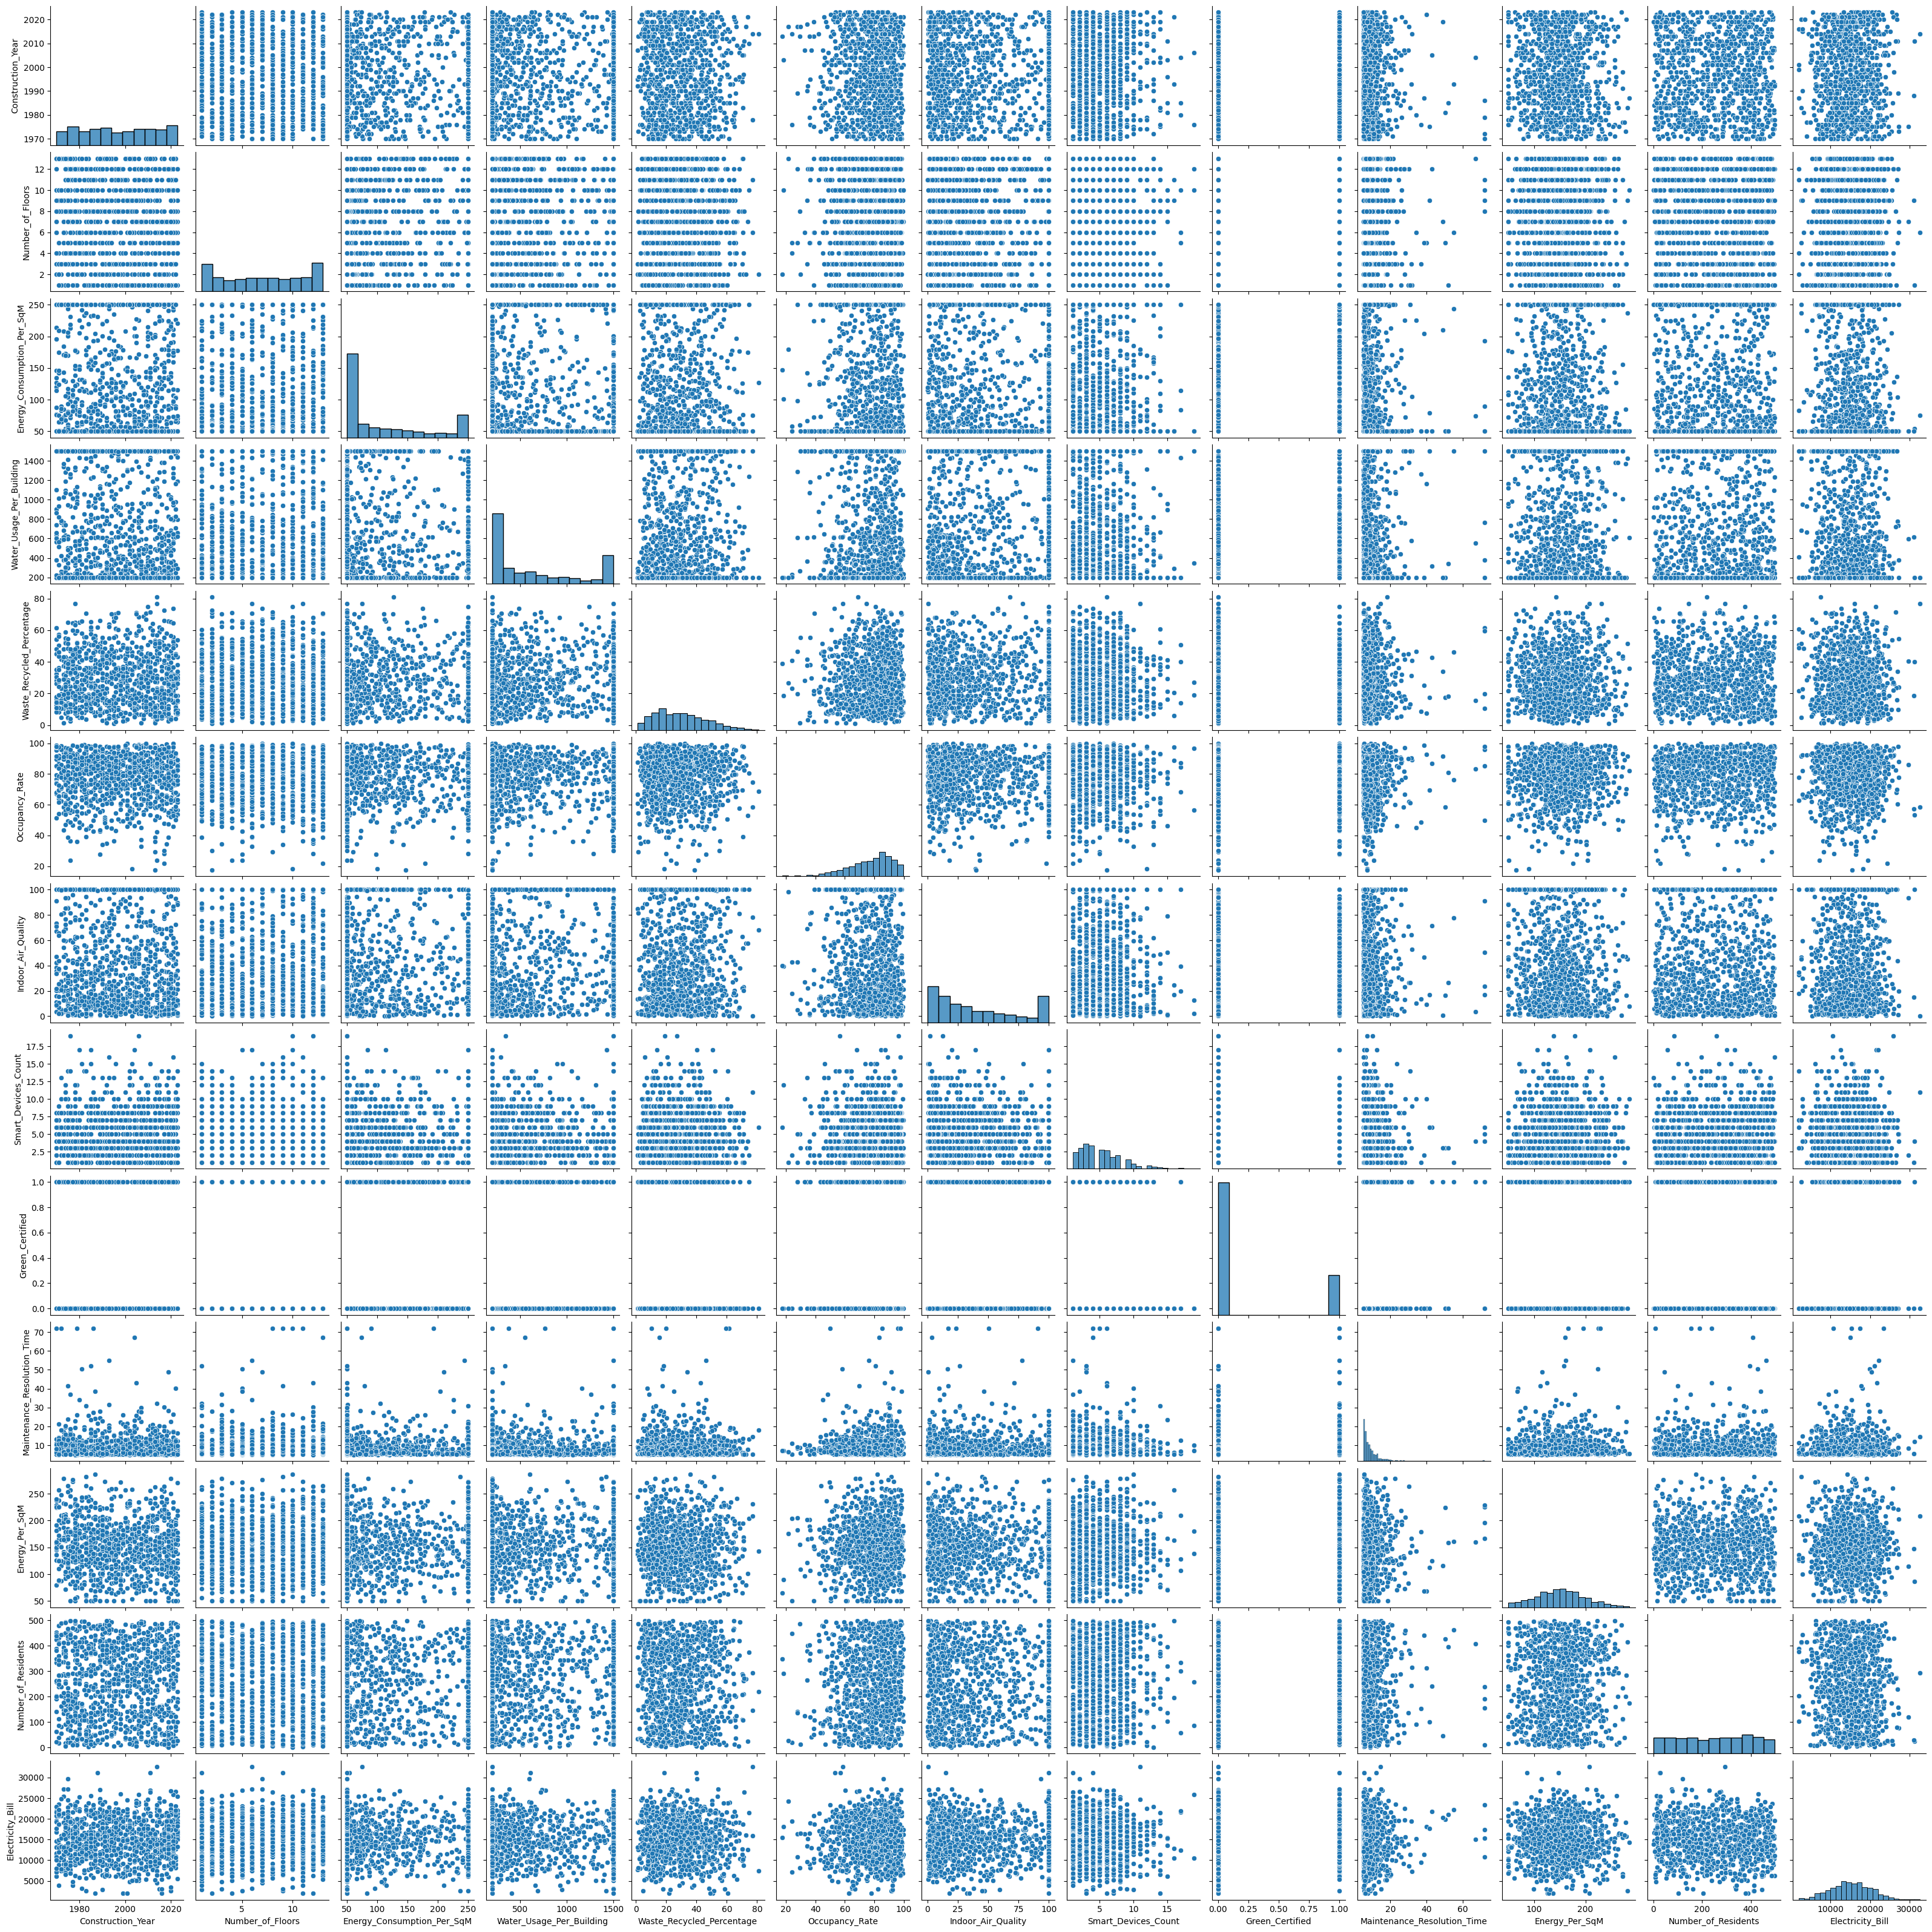

In [92]:
# Pair Plots
sns.pairplot(train_data)
plt.show()

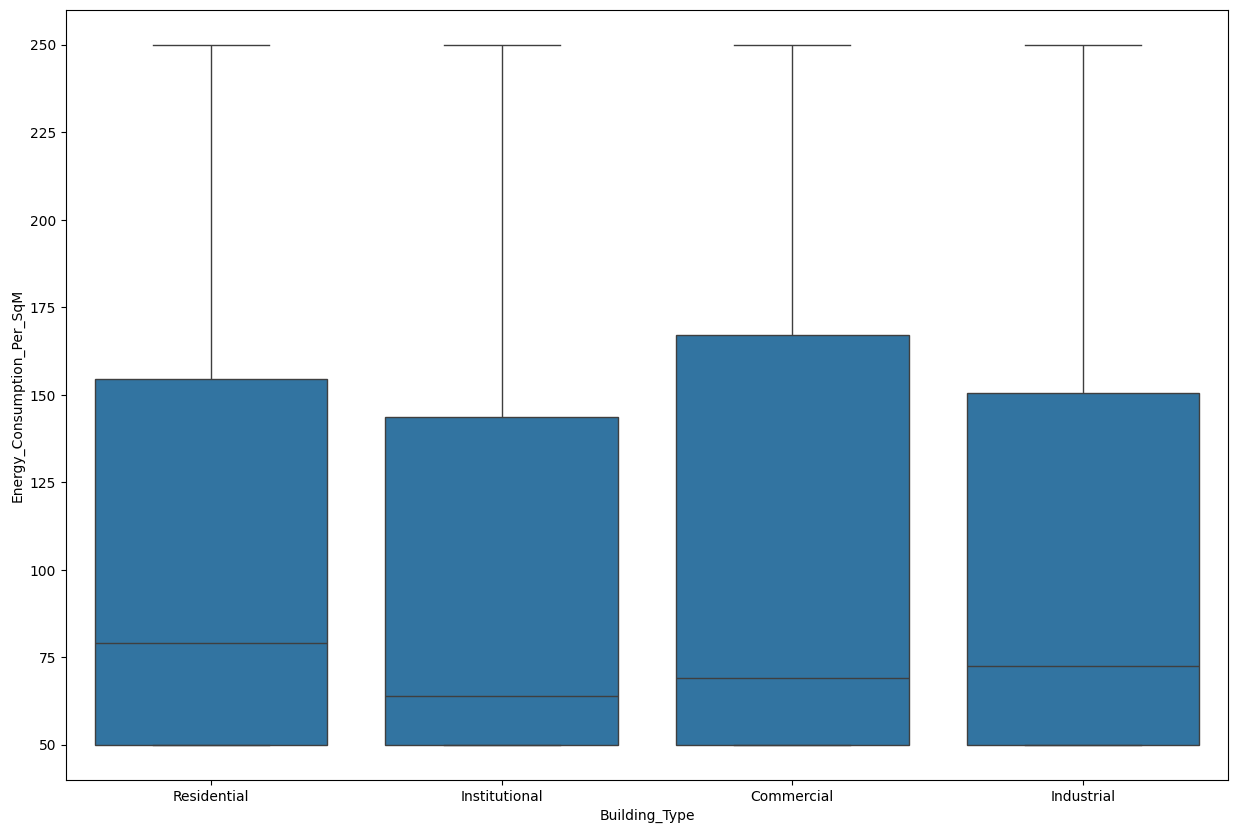

In [93]:
# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(x='Building_Type', y='Energy_Consumption_Per_SqM', data=train_data)
plt.show()

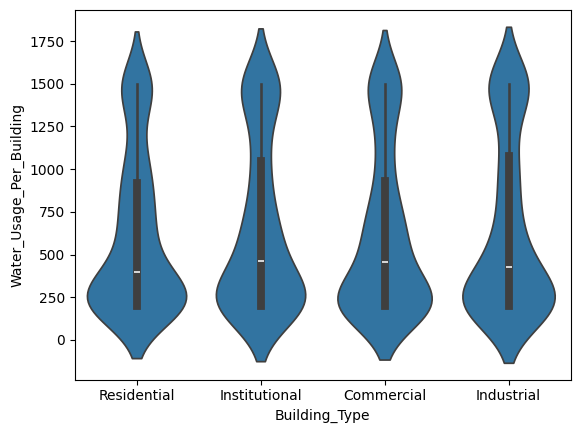

In [94]:
# Violin Plots
sns.violinplot(x='Building_Type', y='Water_Usage_Per_Building', data=train_data)
plt.show()

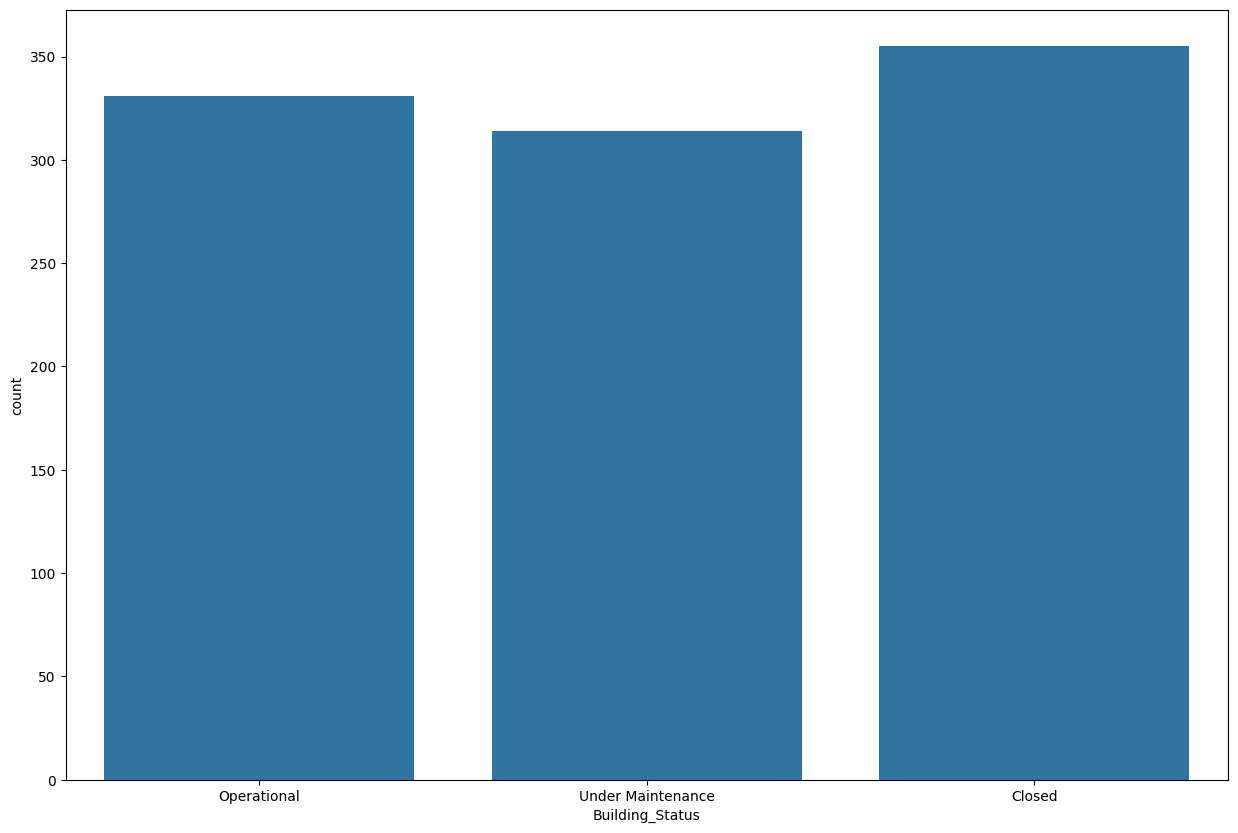

In [95]:
# Count Plots
plt.figure(figsize=(15, 10))
sns.countplot(x='Building_Status', data=train_data)
plt.show()

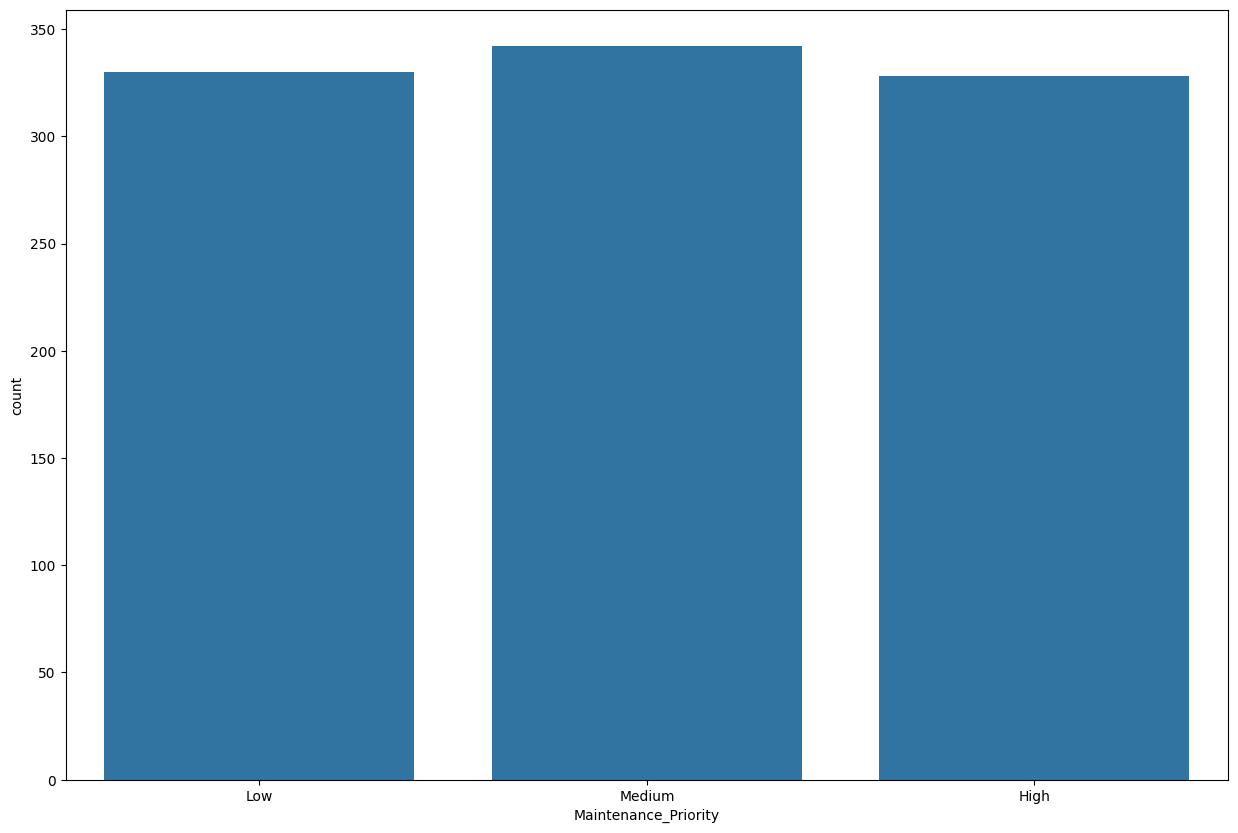

In [96]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Maintenance_Priority', data=train_data)
plt.show()

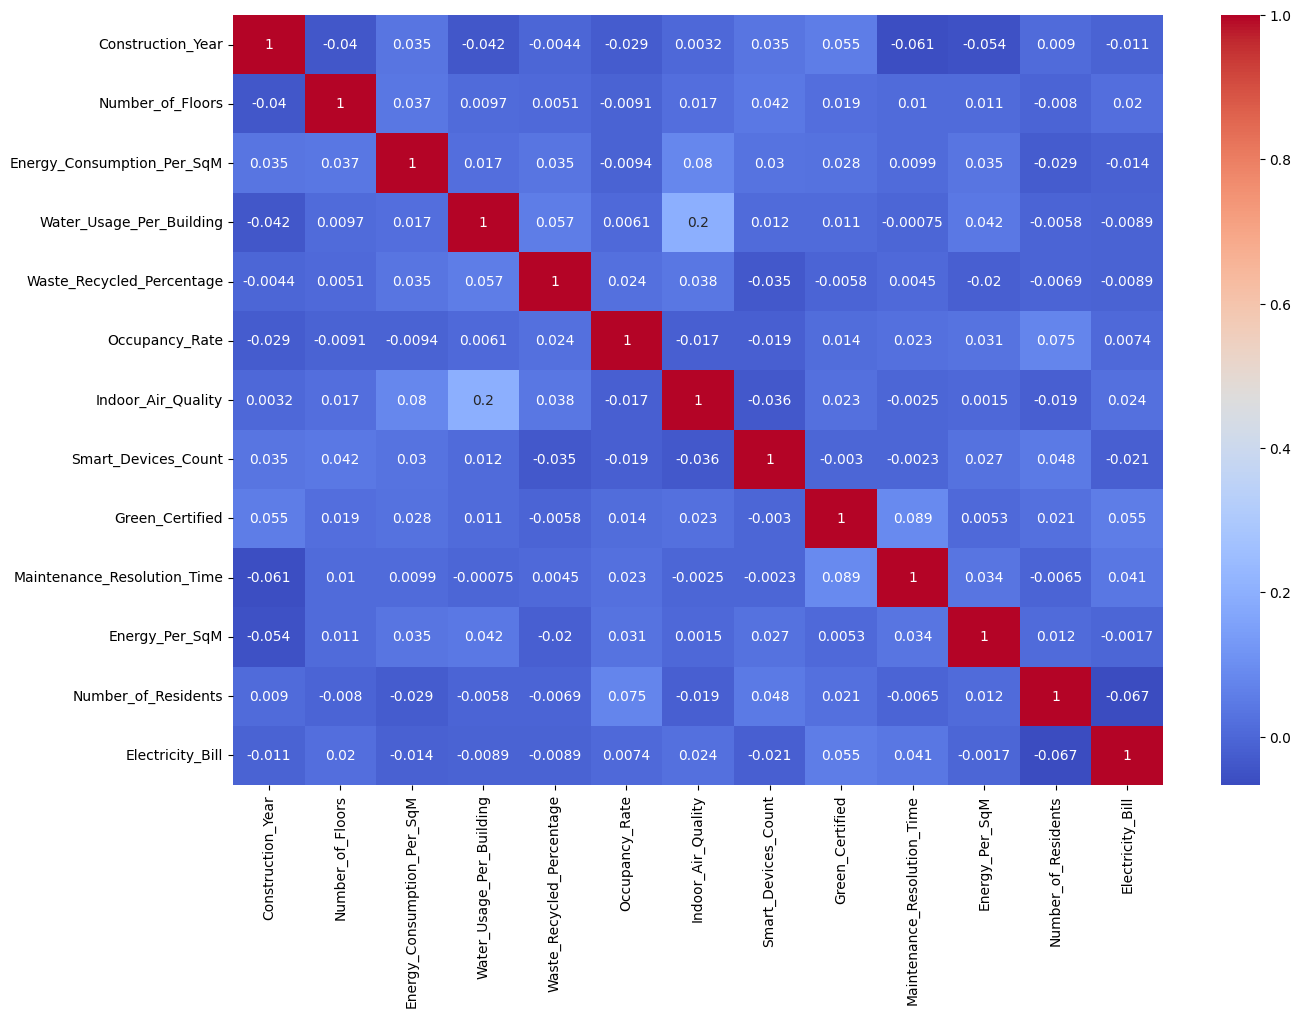

In [97]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
corr = train_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

UMAP

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


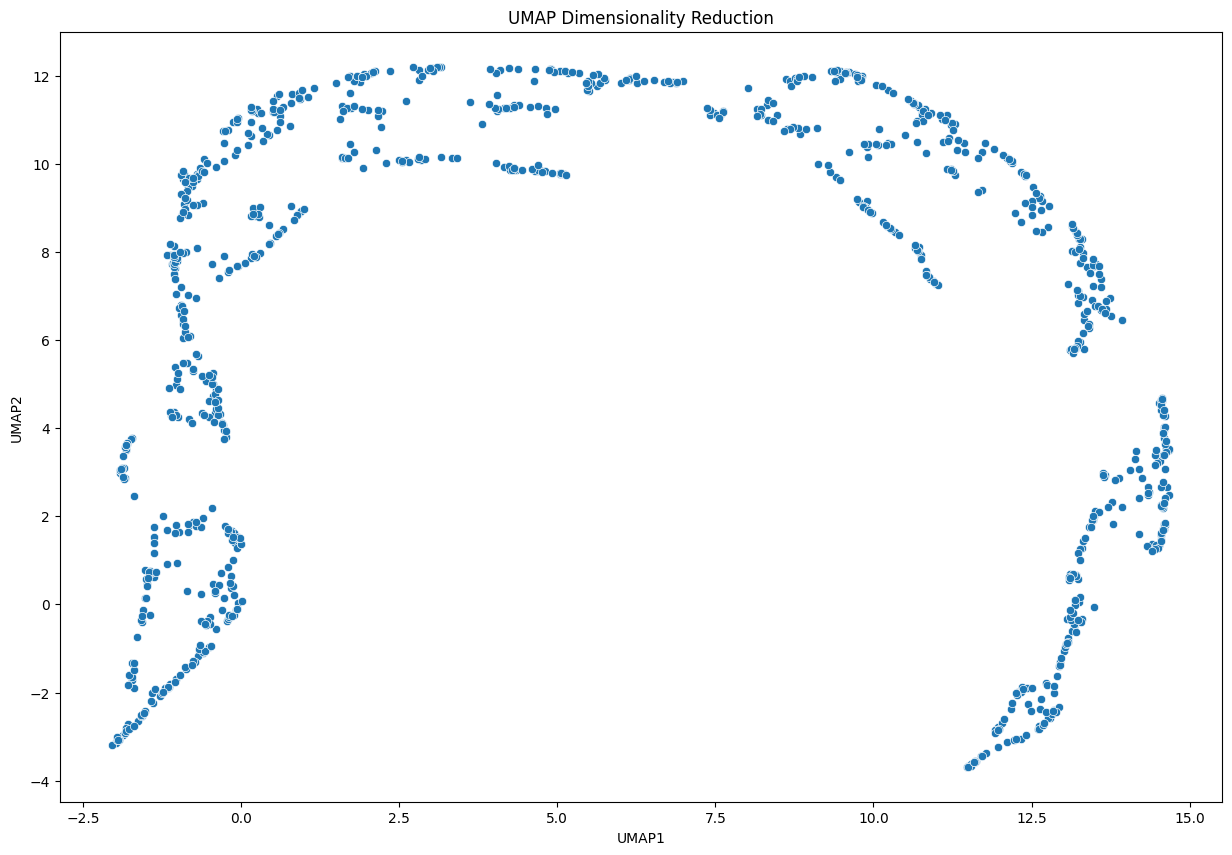

In [98]:
numeric_data = train_data[numeric_cols].dropna()

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(numeric_data)

# Create a dataframe for the embedding
embedding_data = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# Plot the results
plt.figure(figsize=(15, 10))
sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_data)
plt.title('UMAP Dimensionality Reduction')
plt.show()

Linear Regression

In [99]:
# Preprocessing Steps
# Replacing missing values by the mean
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

In [100]:
# Normalize numerical features
scaler = StandardScaler()
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

In [101]:
# Label Encoding for categorical features
categorical_cols = train_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

In [102]:
# Define features and target variable
X_train = train_data.drop('Electricity_Bill', axis=1)
y_train = train_data['Electricity_Bill']
X_test = test_data.drop('Electricity_Bill', axis=1)
y_test = test_data['Electricity_Bill']

In [103]:
# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [105]:
# Evaluation Metrics
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [106]:
# Train Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2_score(r2_train, X_train.shape[0], X_train.shape[1])
mae_train = mean_absolute_error(y_train, y_train_pred)

In [107]:
# Test Metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2_score(r2_test, X_test.shape[0], X_test.shape[1])
mae_test = mean_absolute_error(y_test, y_test_pred)

In [108]:
# Print Metrics
print("Train Metrics:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R2: {r2_train}")
print(f"Adjusted R2: {adj_r2_train}")
print(f"MAE: {mae_train}")

print("\nTest Metrics:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R2: {r2_test}")
print(f"Adjusted R2: {adj_r2_test}")
print(f"MAE: {mae_test}")

Train Metrics:
MSE: 0.9860774791553897
RMSE: 0.9930143398538561
R2: 0.013922520844610431
Adjusted R2: -0.0011091480449534341
MAE: 0.8041565546016305

Test Metrics:
MSE: 0.9781406369408592
RMSE: 0.989009927625026
R2: 3.7344733075483916e-05
Adjusted R2: -0.0640628254763429
MAE: 0.7712544435163373


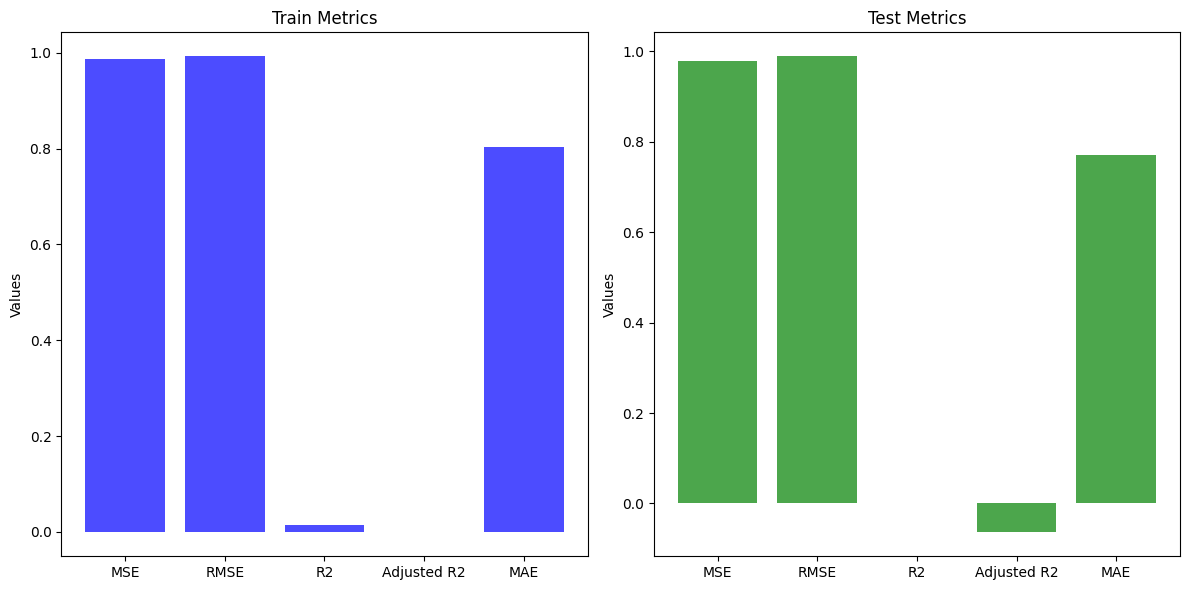

In [109]:
# Plot Metrics
metrics = ['MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAE']
train_metrics = [mse_train, rmse_train, r2_train, adj_r2_train, mae_train]
test_metrics = [mse_test, rmse_test, r2_test, adj_r2_test, mae_test]

x = range(len(metrics))

plt.figure(figsize=(12, 6))

# Plot Train Metrics
plt.subplot(1, 2, 1)
plt.bar(x, train_metrics, color='blue', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Train Metrics')
plt.ylabel('Values')

# Plot Test Metrics
plt.subplot(1, 2, 2)
plt.bar(x, test_metrics, color='green', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Test Metrics')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

Poor Model Performance: The low R2 and adjusted R2 scores, along with high MSE, RMSE, and MAE values, indicate that the model is not capturing the underlying patterns in the data.
Overfitting/Underfitting: The similar performance on both training and testing datasets suggests that the model is not overfitting but rather underfitting. This means the model is too simple to capture the complexity of the data.

RFE

In [110]:
# Feature Selection using RFE
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [111]:
# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')


In [112]:
# Train the regression model using the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model.fit(X_train_selected, y_train)

LinearRegression()

In [113]:
# Predictions
y_train_pred_selected = model.predict(X_train_selected)
y_test_pred_selected = model.predict(X_test_selected)

In [114]:
# Evaluation Metrics for selected features
# Train Metrics
mse_train_selected = mean_squared_error(y_train, y_train_pred_selected)
rmse_train_selected = np.sqrt(mse_train_selected)
r2_train_selected = r2_score(y_train, y_train_pred_selected)
adj_r2_train_selected = adjusted_r2_score(r2_train_selected, X_train_selected.shape[0], X_train_selected.shape[1])
mae_train_selected = mean_absolute_error(y_train, y_train_pred_selected)

In [115]:
# Test Metrics
mse_test_selected = mean_squared_error(y_test, y_test_pred_selected)
rmse_test_selected = np.sqrt(mse_test_selected)
r2_test_selected = r2_score(y_test, y_test_pred_selected)
adj_r2_test_selected = adjusted_r2_score(r2_test_selected, X_test_selected.shape[0], X_test_selected.shape[1])
mae_test_selected = mean_absolute_error(y_test, y_test_pred_selected)

In [116]:
# Print Metrics for selected features
print("\nTrain Metrics with Selected Features:")
print(f"MSE: {mse_train_selected}")
print(f"RMSE: {rmse_train_selected}")
print(f"R2: {r2_train_selected}")
print(f"Adjusted R2: {adj_r2_train_selected}")
print(f"MAE: {mae_train_selected}")

print("\nTest Metrics with Selected Features:")
print(f"MSE: {mse_test_selected}")
print(f"RMSE: {rmse_test_selected}")
print(f"R2: {r2_test_selected}")
print(f"Adjusted R2: {adj_r2_test_selected}")
print(f"MAE: {mae_test_selected}")


Train Metrics with Selected Features:
MSE: 0.9898654545087161
RMSE: 0.9949198231559747
R2: 0.010134545491284008
Adjusted R2: 0.007153023037944517
MAE: 0.8041856408006224

Test Metrics with Selected Features:
MSE: 0.9645790232577828
RMSE: 0.9821298403254952
R2: 0.013901513867941251
Adjusted R2: 0.0018759225736478813
MAE: 0.7655416698015712


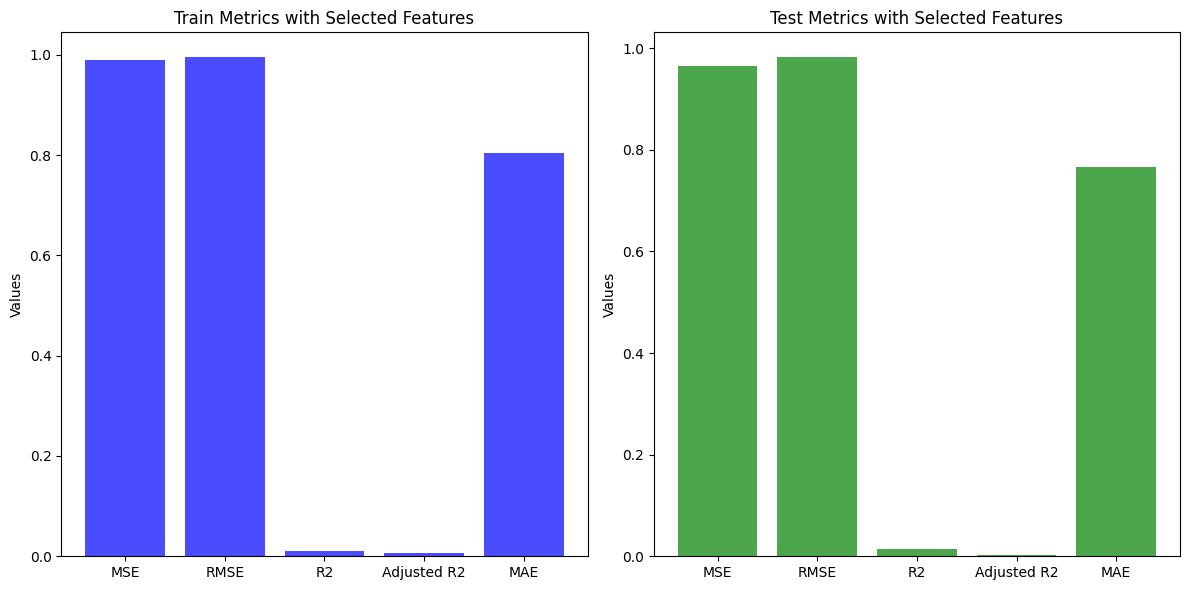

In [117]:
# Plot Metrics for selected features
metrics = ['MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAE']
train_metrics_selected = [mse_train_selected, rmse_train_selected, r2_train_selected, adj_r2_train_selected, mae_train_selected]
test_metrics_selected = [mse_test_selected, rmse_test_selected, r2_test_selected, adj_r2_test_selected, mae_test_selected]

x = range(len(metrics))

plt.figure(figsize=(12, 6))

# Plot Train Metrics
plt.subplot(1, 2, 1)
plt.bar(x, train_metrics_selected, color='blue', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Train Metrics with Selected Features')
plt.ylabel('Values')

# Plot Test Metrics
plt.subplot(1, 2, 2)
plt.bar(x, test_metrics_selected, color='green', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Test Metrics with Selected Features')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

Slight Improvement: There is a slight improvement in the metrics after feature selection, but the model's performance is still poor.
Underfitting: The similar performance on both training and testing datasets suggests that the model is underfitting. This means the model is too simple to capture the complexity of the data.

Train Metrics:

MSE and RMSE: Both metrics are slightly worse with the selected features compared to using all features.
R2 and Adjusted R2: The R2 score and adjusted R2 score are slightly lower with the selected features, indicating a minor decrease in the model's ability to explain the variance in the training data.
MAE: The MAE is almost the same in both cases.
Test Metrics:

MSE and RMSE: Both metrics are slightly better with the selected features compared to using all features.
R2 and Adjusted R2: The R2 score and adjusted R2 score are slightly higher with the selected features, indicating a minor improvement in the model's ability to explain the variance in the test data.
MAE: The MAE is slightly better with the selected features.

## One-Hot Encoding and Ridge Regression

In [118]:
# One-Hot Encoding for categorical features
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols)

In [119]:
# Align the columns
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1, fill_value=0)

In [120]:
# Define features and target variable for Ridge Regression
X_train_encoded = train_data_encoded.drop('Electricity_Bill', axis=1)
y_train_encoded = train_data_encoded['Electricity_Bill']
X_test_encoded = test_data_encoded.drop('Electricity_Bill', axis=1)
y_test_encoded = test_data_encoded['Electricity_Bill']

In [121]:
# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_encoded, y_train_encoded)

Ridge()

In [122]:
# Predictions
y_train_pred_ridge = ridge_model.predict(X_train_encoded)
y_test_pred_ridge = ridge_model.predict(X_test_encoded)

In [123]:
# Evaluation Metrics for Ridge Regression
# Train Metrics
mse_train_ridge = mean_squared_error(y_train_encoded, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_train_ridge = r2_score(y_train_encoded, y_train_pred_ridge)
adj_r2_train_ridge = adjusted_r2_score(r2_train_ridge, X_train_encoded.shape[0], X_train_encoded.shape[1])
mae_train_ridge = mean_absolute_error(y_train_encoded, y_train_pred_ridge)

In [124]:
# Test Metrics
mse_test_ridge = mean_squared_error(y_test_encoded, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test_encoded, y_test_pred_ridge)
adj_r2_test_ridge = adjusted_r2_score(r2_test_ridge, X_test_encoded.shape[0], X_test_encoded.shape[1])
mae_test_ridge = mean_absolute_error(y_test_encoded, y_test_pred_ridge)

In [125]:
# Print Metrics for Ridge Regression
print("\nTrain Metrics with Ridge Regression:")
print(f"MSE: {mse_train_ridge}")
print(f"RMSE: {rmse_train_ridge}")
print(f"R2: {r2_train_ridge}")
print(f"Adjusted R2: {adj_r2_train_ridge}")
print(f"MAE: {mae_train_ridge}")

print("\nTest Metrics with Ridge Regression:")
print(f"MSE: {mse_test_ridge}")
print(f"RMSE: {rmse_test_ridge}")
print(f"R2: {r2_test_ridge}")
print(f"Adjusted R2: {adj_r2_test_ridge}")
print(f"MAE: {mae_test_ridge}")


Train Metrics with Ridge Regression:
MSE: 0.974551476915771
RMSE: 0.9871937382883722
R2: 0.02544852308422907
Adjusted R2: 0.003503658711509594
MAE: 0.7982132190009789

Test Metrics with Ridge Regression:
MSE: 0.9721406419770157
RMSE: 0.9859719275806059
R2: 0.006171197748729207
Adjusted R2: -0.09014701216108545
MAE: 0.7622417751111837



Train Metrics with Ridge Regression:
MSE: 0.974551476915771
RMSE: 0.9871937382883722
R2: 0.02544852308422907
Adjusted R2: 0.003503658711509594
MAE: 0.7982132190009789

Test Metrics with Ridge Regression:
MSE: 0.9721406419770157
RMSE: 0.9859719275806059
R2: 0.006171197748729207
Adjusted R2: -0.09014701216108545
MAE: 0.7622417751111837


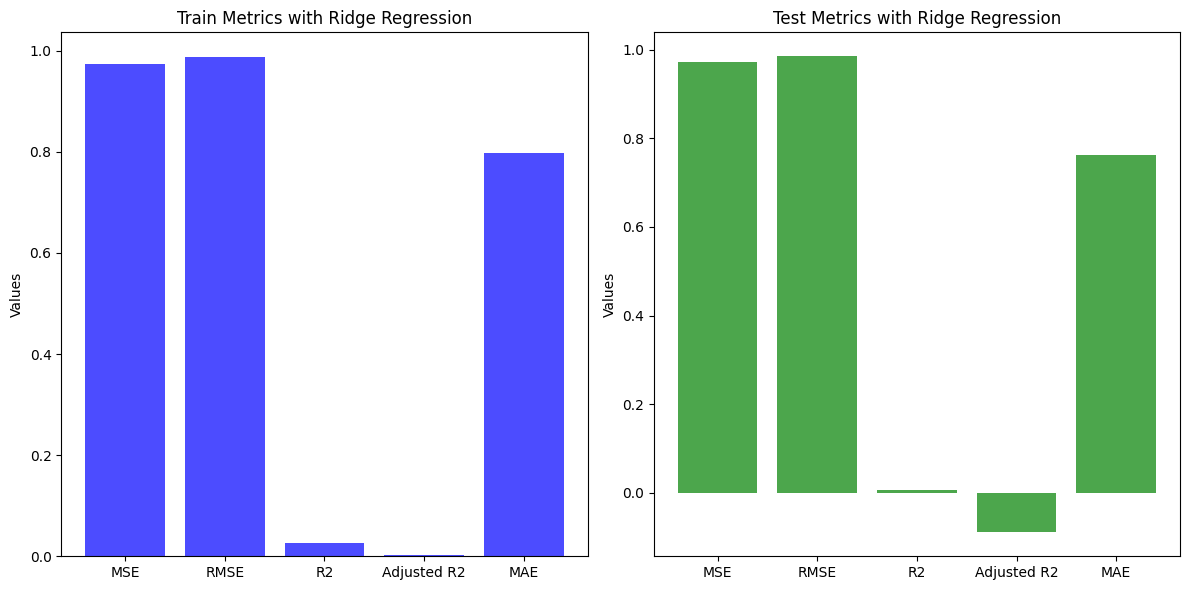

In [126]:
# Print Metrics for Ridge Regression
print("\nTrain Metrics with Ridge Regression:")
print(f"MSE: {mse_train_ridge}")
print(f"RMSE: {rmse_train_ridge}")
print(f"R2: {r2_train_ridge}")
print(f"Adjusted R2: {adj_r2_train_ridge}")
print(f"MAE: {mae_train_ridge}")

print("\nTest Metrics with Ridge Regression:")
print(f"MSE: {mse_test_ridge}")
print(f"RMSE: {rmse_test_ridge}")
print(f"R2: {r2_test_ridge}")
print(f"Adjusted R2: {adj_r2_test_ridge}")
print(f"MAE: {mae_test_ridge}")

# Plot Metrics for Ridge Regression
metrics = ['MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAE']
train_metrics_ridge = [mse_train_ridge, rmse_train_ridge, r2_train_ridge, adj_r2_train_ridge, mae_train_ridge]
test_metrics_ridge = [mse_test_ridge, rmse_test_ridge, r2_test_ridge, adj_r2_test_ridge, mae_test_ridge]

x = range(len(metrics))

plt.figure(figsize=(12, 6))

# Plot Train Metrics
plt.subplot(1, 2, 1)
plt.bar(x, train_metrics_ridge, color='blue', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Train Metrics with Ridge Regression')
plt.ylabel('Values')

# Plot Test Metrics
plt.subplot(1, 2, 2)
plt.bar(x, test_metrics_ridge, color='green', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Test Metrics with Ridge Regression')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

Analysis
Train Metrics:

MSE and RMSE: Ridge Regression shows a slight improvement in MSE and RMSE compared to both the original model and the model with selected features.
R2 and Adjusted R2: Ridge Regression has a slightly higher R2 score compared to the original model and the model with selected features, indicating a better fit on the training data.
MAE: Ridge Regression has a slightly lower MAE compared to the original model and the model with selected features.
Test Metrics:

MSE and RMSE: Ridge Regression shows a slight improvement in MSE and RMSE compared to the original model and the model with selected features.
R2 and Adjusted R2: Ridge Regression has a slightly higher R2 score compared to the original model but lower than the model with selected features. The adjusted R2 score is negative, indicating that the model is not performing well on the test data.
MAE: Ridge Regression has a slightly lower MAE compared to the original model and the model with selected features.

Conclusion
Improvement with Ridge Regression: Ridge Regression with One-Hot Encoding shows a slight improvement in most metrics compared to the original model and the model with selected features. However, the improvement is not substantial.
Underfitting: The similar performance on both training and testing datasets suggests that the model is still underfitting. This means the model is too simple to capture the complexity of the data.

## ICA

In [127]:
from sklearn.decomposition import FastICA

In [128]:
from sklearn.decomposition import FastICA

components_list = [4, 5, 6, 8]
for n_components in components_list:
    # Apply FastICA
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train_encoded)
    X_test_ica = ica.transform(X_test_encoded)
    
    # Train Ridge Regression model
    ridge_model.fit(X_train_ica, y_train_encoded)
    
    # Make predictions
    y_train_pred_ica = ridge_model.predict(X_train_ica)
    y_test_pred_ica = ridge_model.predict(X_test_ica)
    
    # Calculate evaluation metrics for training data
    train_metrics = {
        'MSE': mean_squared_error(y_train_encoded, y_train_pred_ica),
        'RMSE': np.sqrt(mean_squared_error(y_train_encoded, y_train_pred_ica)),
        'R2': r2_score(y_train_encoded, y_train_pred_ica),
        'Adjusted R2': adjusted_r2_score(r2_score(y_train_encoded, y_train_pred_ica), X_train_ica.shape[0], X_train_ica.shape[1]),
        'MAE': mean_absolute_error(y_train_encoded, y_train_pred_ica)
    }
    
    # Calculate evaluation metrics for test data
    test_metrics = {
        'MSE': mean_squared_error(y_test_encoded, y_test_pred_ica),
        'RMSE': np.sqrt(mean_squared_error(y_test_encoded, y_test_pred_ica)),
        'R2': r2_score(y_test_encoded, y_test_pred_ica),
        'Adjusted R2': adjusted_r2_score(r2_score(y_test_encoded, y_test_pred_ica), X_test_ica.shape[0], X_test_ica.shape[1]),
        'MAE': mean_absolute_error(y_test_encoded, y_test_pred_ica)
    }
    
    # Print training metrics
    print(f"\nTrain Metrics with ICA ({n_components} components):")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    # Print test metrics
    print(f"\nTest Metrics with ICA ({n_components} components):")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")


Train Metrics with ICA (4 components):
MSE: 0.9990214640526406
RMSE: 0.9995106122761481
R2: 0.0009785359473595268
Adjusted R2: -0.0030376307422994575
MAE: 0.8047634392568596

Test Metrics with ICA (4 components):
MSE: 0.9809877504971333
RMSE: 0.9904482573547865
R2: -0.0028732870555008283
Adjusted R2: -0.01924672847681519
MAE: 0.7711420629273451

Train Metrics with ICA (5 components):
MSE: 0.9928977052035752
RMSE: 0.9964425247868415
R2: 0.0071022947964248795
Adjusted R2: 0.0021078395388616222
MAE: 0.806083231908769

Test Metrics with ICA (5 components):
MSE: 0.98780892805077
RMSE: 0.9938857721341875
R2: -0.009846642993266874
Adjusted R2: -0.03054022174312898
MAE: 0.7738287184522998

Train Metrics with ICA (6 components):
MSE: 0.9928014193911952
RMSE: 0.996394208830619
R2: 0.007198580608804961
Adjusted R2: 0.0011997804916376031
MAE: 0.8061518875349377

Test Metrics with ICA (6 components):
MSE: 0.9860827224421028
RMSE: 0.9930169799364474
R2: -0.008081926265641526
Adjusted R2: -0.0329728

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


Conclusion
No Significant Improvement: The use of ICA with Ridge Regression does not show significant improvement over the original model using all features. In fact, the metrics indicate a slight decrease in performance.
Underfitting: The similar performance on both training and testing datasets suggests that the model is still underfitting. This means the model is too simple to capture the complexity of the data.

In [129]:
from sklearn.linear_model import ElasticNet

# Define a list of alpha values to test
alpha_list = [0.1, 0.5, 1.0, 5.0, 10.0]

# Loop through each alpha value
for alpha in alpha_list:
    # Apply ElasticNet Regression
    elasticnet_model = ElasticNet(alpha=alpha, random_state=42)
    elasticnet_model.fit(X_train_encoded, y_train_encoded)
    
    # Predictions
    y_train_pred_en = elasticnet_model.predict(X_train_encoded)
    y_test_pred_en = elasticnet_model.predict(X_test_encoded)
    
    # Calculate evaluation metrics for training data
    train_metrics = {
        'MSE': mean_squared_error(y_train_encoded, y_train_pred_en),
        'RMSE': np.sqrt(mean_squared_error(y_train_encoded, y_train_pred_en)),
        'R2': r2_score(y_train_encoded, y_train_pred_en),
        'Adjusted R2': adjusted_r2_score(r2_score(y_train_encoded, y_train_pred_en), X_train_encoded.shape[0], X_train_encoded.shape[1]),
        'MAE': mean_absolute_error(y_train_encoded, y_train_pred_en)
    }
    
    # Calculate evaluation metrics for test data
    test_metrics = {
        'MSE': mean_squared_error(y_test_encoded, y_test_pred_en),
        'RMSE': np.sqrt(mean_squared_error(y_test_encoded, y_test_pred_en)),
        'R2': r2_score(y_test_encoded, y_test_pred_en),
        'Adjusted R2': adjusted_r2_score(r2_score(y_test_encoded, y_test_pred_en), X_test_encoded.shape[0], X_test_encoded.shape[1]),
        'MAE': mean_absolute_error(y_test_encoded, y_test_pred_en)
    }
    
    # Print training metrics
    print(f"\nTrain Metrics with ElasticNet (alpha={alpha}):")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value}")
    
    # Print test metrics
    print(f"\nTest Metrics with ElasticNet (alpha={alpha}):")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value}")


Train Metrics with ElasticNet (alpha=0.1):
MSE: 0.9975707958729265
RMSE: 0.9987846594100885
R2: 0.002429204127073592
Adjusted R2: -0.02003400724365756
MAE: 0.8045653461552231

Test Metrics with ElasticNet (alpha=0.1):
MSE: 0.9780223585073368
RMSE: 0.9889501294339047
R2: 0.00015826192225987246
Adjusted R2: -0.09674269947734482
MAE: 0.7696135354466296

Train Metrics with ElasticNet (alpha=0.5):
MSE: 1.0000000000000002
RMSE: 1.0
R2: 0.0
Adjusted R2: -0.022517911975435068
MAE: 0.8049719862860575

Test Metrics with ElasticNet (alpha=0.5):
MSE: 0.9816940017294083
RMSE: 0.9908047243172634
R2: -0.0035952945366743982
Adjusted R2: -0.10086003673846666
MAE: 0.7712446669107382

Train Metrics with ElasticNet (alpha=1.0):
MSE: 1.0000000000000002
RMSE: 1.0
R2: 0.0
Adjusted R2: -0.022517911975435068
MAE: 0.8049719862860575

Test Metrics with ElasticNet (alpha=1.0):
MSE: 0.9816940017294083
RMSE: 0.9908047243172634
R2: -0.0035952945366743982
Adjusted R2: -0.10086003673846666
MAE: 0.7712446669107382

Tr

## Gradient Boosting Regressor

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

# Apply Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_encoded, y_train_encoded)

# Predictions
y_train_pred_gbr = gbr_model.predict(X_train_encoded)
y_test_pred_gbr = gbr_model.predict(X_test_encoded)

# Evaluation Metrics for Gradient Boosting Regressor
# Train Metrics
mse_train_gbr = mean_squared_error(y_train_encoded, y_train_pred_gbr)
rmse_train_gbr = np.sqrt(mse_train_gbr)
r2_train_gbr = r2_score(y_train_encoded, y_train_pred_gbr)
adj_r2_train_gbr = adjusted_r2_score(r2_train_gbr, X_train_encoded.shape[0], X_train_encoded.shape[1])
mae_train_gbr = mean_absolute_error(y_train_encoded, y_train_pred_gbr)

# Test Metrics
mse_test_gbr = mean_squared_error(y_test_encoded, y_test_pred_gbr)
rmse_test_gbr = np.sqrt(mse_test_gbr)
r2_test_gbr = r2_score(y_test_encoded, y_test_pred_gbr)
adj_r2_test_gbr = adjusted_r2_score(r2_test_gbr, X_test_encoded.shape[0], X_test_encoded.shape[1])
mae_test_gbr = mean_absolute_error(y_test_encoded, y_test_pred_gbr)

# Print Metrics for Gradient Boosting Regressor
print("\nTrain Metrics with Gradient Boosting Regressor:")
print(f"MSE: {mse_train_gbr}")
print(f"RMSE: {rmse_train_gbr}")
print(f"R2: {r2_train_gbr}")
print(f"Adjusted R2: {adj_r2_train_gbr}")
print(f"MAE: {mae_train_gbr}")

print("\nTest Metrics with Gradient Boosting Regressor:")
print(f"MSE: {mse_test_gbr}")
print(f"RMSE: {rmse_test_gbr}")
print(f"R2: {r2_test_gbr}")
print(f"Adjusted R2: {adj_r2_test_gbr}")
print(f"MAE: {mae_test_gbr}")


Train Metrics with Gradient Boosting Regressor:
MSE: 0.6056001988780503
RMSE: 0.7782031861140446
R2: 0.39439980112194983
Adjusted R2: 0.38076294915130804
MAE: 0.6227447613203396

Test Metrics with Gradient Boosting Regressor:
MSE: 0.9948394442741598
RMSE: 0.9974163846028197
R2: -0.017034007882456237
Adjusted R2: -0.11560118045256207
MAE: 0.7664125705799628



Train Metrics with Gradient Boosting Regressor:
MSE: 0.6056001988780503
RMSE: 0.7782031861140446
R2: 0.39439980112194983
Adjusted R2: 0.38076294915130804
MAE: 0.6227447613203396

Test Metrics with Gradient Boosting Regressor:
MSE: 0.9948394442741598
RMSE: 0.9974163846028197
R2: -0.017034007882456237
Adjusted R2: -0.11560118045256207
MAE: 0.7664125705799628


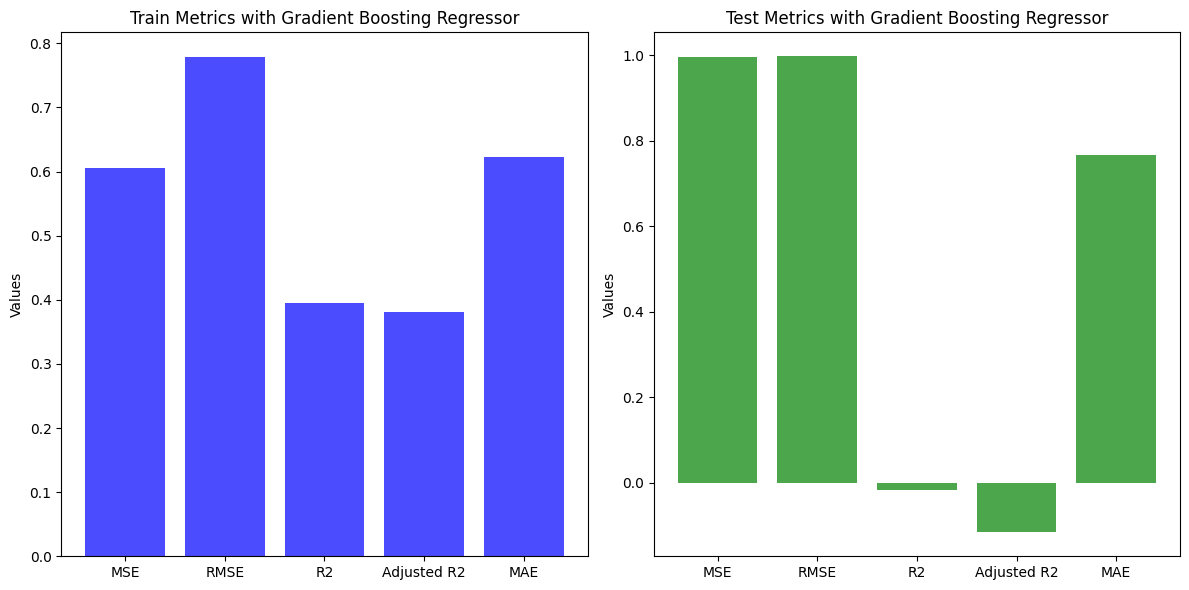

In [131]:
# Print Metrics for Gradient Boosting Regressor
print("\nTrain Metrics with Gradient Boosting Regressor:")
print(f"MSE: {mse_train_gbr}")
print(f"RMSE: {rmse_train_gbr}")
print(f"R2: {r2_train_gbr}")
print(f"Adjusted R2: {adj_r2_train_gbr}")
print(f"MAE: {mae_train_gbr}")

print("\nTest Metrics with Gradient Boosting Regressor:")
print(f"MSE: {mse_test_gbr}")
print(f"RMSE: {rmse_test_gbr}")
print(f"R2: {r2_test_gbr}")
print(f"Adjusted R2: {adj_r2_test_gbr}")
print(f"MAE: {mae_test_gbr}")

# Plot Metrics for Gradient Boosting Regressor
metrics = ['MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAE']
train_metrics_gbr = [mse_train_gbr, rmse_train_gbr, r2_train_gbr, adj_r2_train_gbr, mae_train_gbr]
test_metrics_gbr = [mse_test_gbr, rmse_test_gbr, r2_test_gbr, adj_r2_test_gbr, mae_test_gbr]

x = range(len(metrics))

plt.figure(figsize=(12, 6))

# Plot Train Metrics
plt.subplot(1, 2, 1)
plt.bar(x, train_metrics_gbr, color='blue', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Train Metrics with Gradient Boosting Regressor')
plt.ylabel('Values')

# Plot Test Metrics
plt.subplot(1, 2, 2)
plt.bar(x, test_metrics_gbr, color='green', alpha=0.7)
plt.xticks(x, metrics)
plt.title('Test Metrics with Gradient Boosting Regressor')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

Analysis
Train Metrics:

MSE and RMSE: The Gradient Boosting Regressor shows a significant improvement in MSE and RMSE compared to both the original model and the ElasticNet model.
R2 and Adjusted R2: The R2 and adjusted R2 scores are much higher with the Gradient Boosting Regressor, indicating a better fit on the training data.
MAE: The MAE is lower with the Gradient Boosting Regressor, indicating better performance on the training data.
Test Metrics:

MSE and RMSE: The MSE and RMSE values are slightly worse with the Gradient Boosting Regressor compared to the original model and the ElasticNet model.
R2 and Adjusted R2: The R2 and adjusted R2 scores are lower with the Gradient Boosting Regressor, indicating a decrease in the model's ability to explain the variance in the test data.
MAE: The MAE is slightly better with the Gradient Boosting Regressor compared to the original model and the ElasticNet model.

Conclusion
Overfitting: The Gradient Boosting Regressor shows signs of overfitting, as it performs significantly better on the training data but not as well on the test data.
Improvement on Train Data: The Gradient Boosting Regressor shows a significant improvement in the training metrics, indicating that it captures the underlying patterns in the training data better than the previous models.
Slight Decrease on Test Data: The performance on the test data is slightly worse compared to the original model and the ElasticNet model, indicating that the model may not generalize as well to unseen data.